In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

In [3]:
az.style.use("arviz-darkgrid")

### 1.2.1 Probability distribution

Normal distribution

$$
{\rm pdf(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}}
$$

In [11]:
mu = 0 
sd = 1
X = stats.norm(mu, sd)
x = X.rvs(3)
print(x)

[ 0.40413748 -0.57719242  0.94716792]


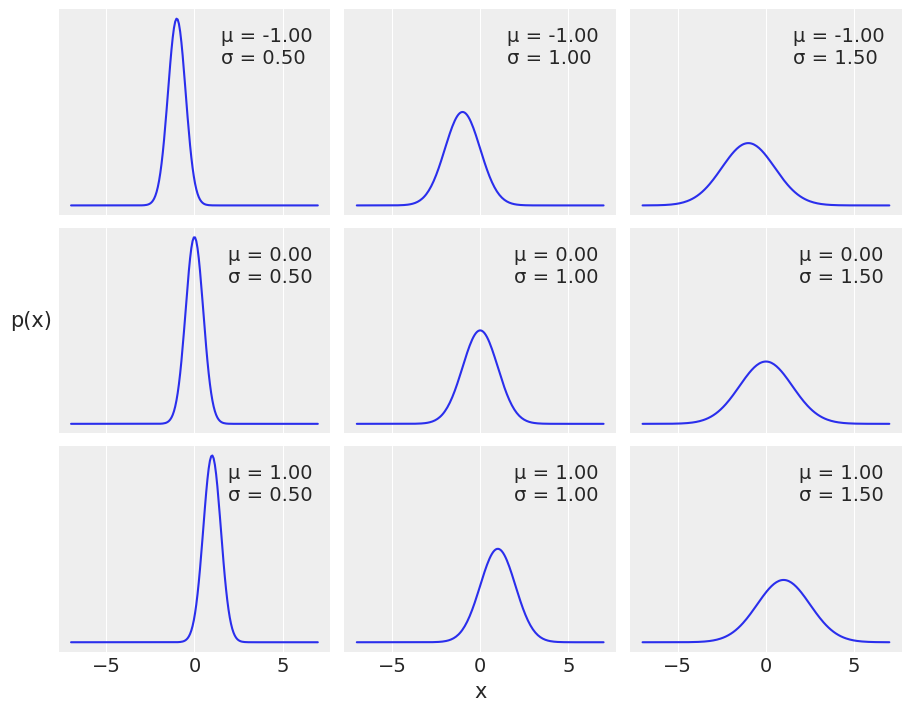

In [25]:
mu_params = [-1, 0, 1]
std_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(std_params), sharex=True, sharey=True,
                     figsize=(9, 7), constrained_layout=True)

for i in range(len(mu_params)):
    for j in range(len(std_params)):
        mu = mu_params[i]
        std = std_params[j]
        y = stats.norm(mu, std).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, std), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])
plt.savefig('B11197_01_01.png', dpi=300);

In [21]:
! curl https://raw.githubusercontent.com/aloctavodia/BAP/master/code/data/mauna_loa_CO2.csv -O
! mv mauna_loa_CO2.csv ../data/mauna_loa_CO2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23400  100 23400    0     0  83571      0 --:--:-- --:--:-- --:--:-- 83870


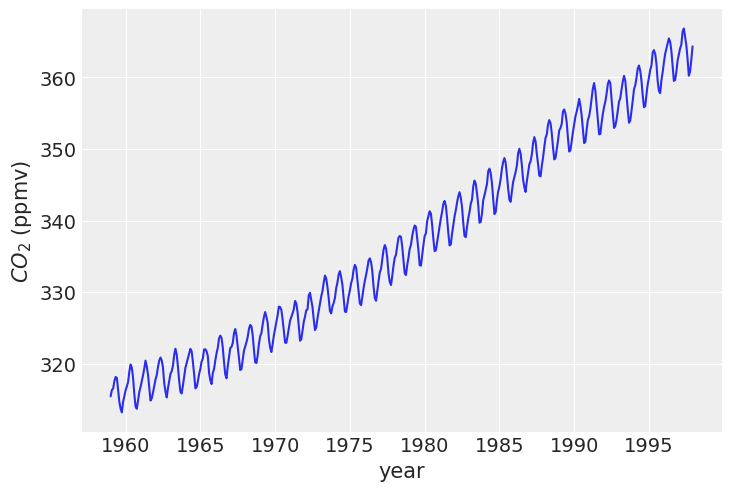

In [23]:
data = np.genfromtxt('../data/mauna_loa_CO2.csv', delimiter=',')
plt.plot(data[:,0], data[:,1])
plt.xlabel('year')
plt.ylabel('$CO_2$ (ppmv)')
plt.savefig('B11197_01_02.png', dpi=300)

### 1.2.2 Bayes' theorem

$$
p(H|D) = \frac{p(D|H)p(H)}{p(D)} \propto p(D|H)p(H)
$$


- $p(H)$: prior
- $p(D|H)$: likelihood
- $p(H|D)$: posterior
- $p(D)$: evidence

### 1.3.1 コイン投げ問題

Binomial distribution

$$
p(y|\theta) = \frac{N!}{y!(N-y)!}\theta^y(1-\theta)^{N-y}
$$

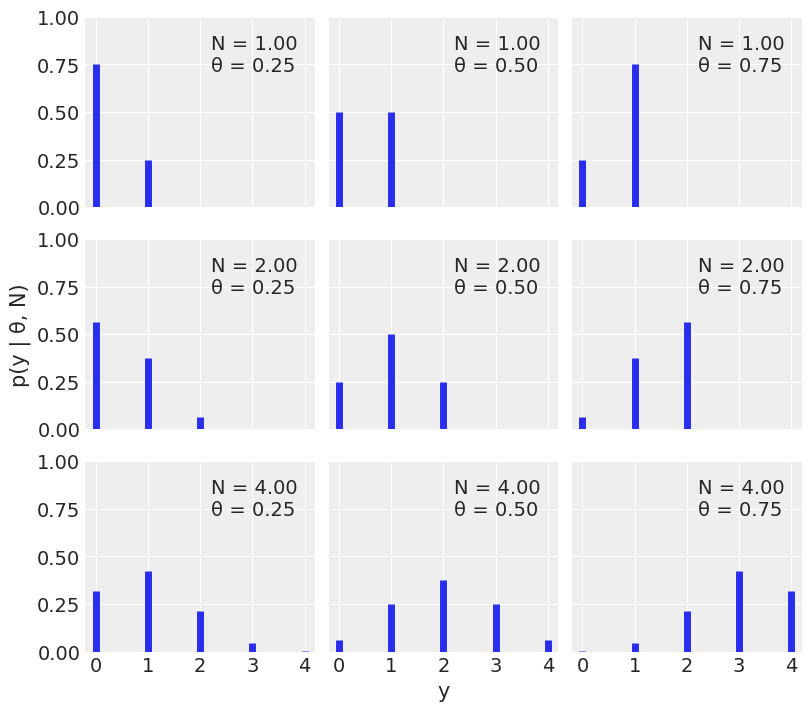

In [27]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)
        
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend()

        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)
plt.savefig('B11197_01_03.png', dpi=300)

Beta distribution

$$
p(\theta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

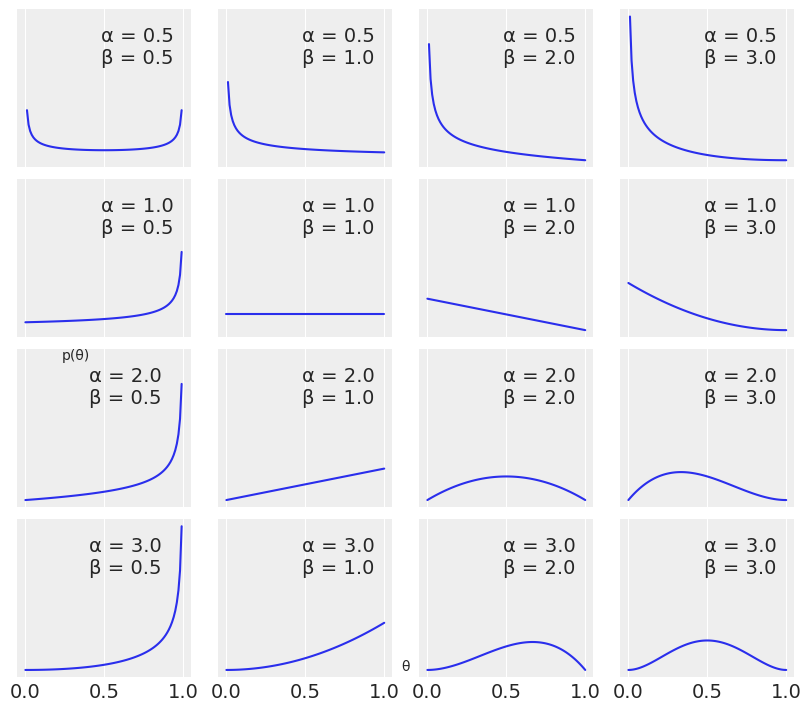

In [28]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,
                     figsize=(8, 7), constrained_layout=True)

for i in range(len(params)):
    for j in range(len(params)):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend()

ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)
plt.savefig('B11197_01_04.png', dpi=300)

/Users/kajyuuen/.anyenv/envs/pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


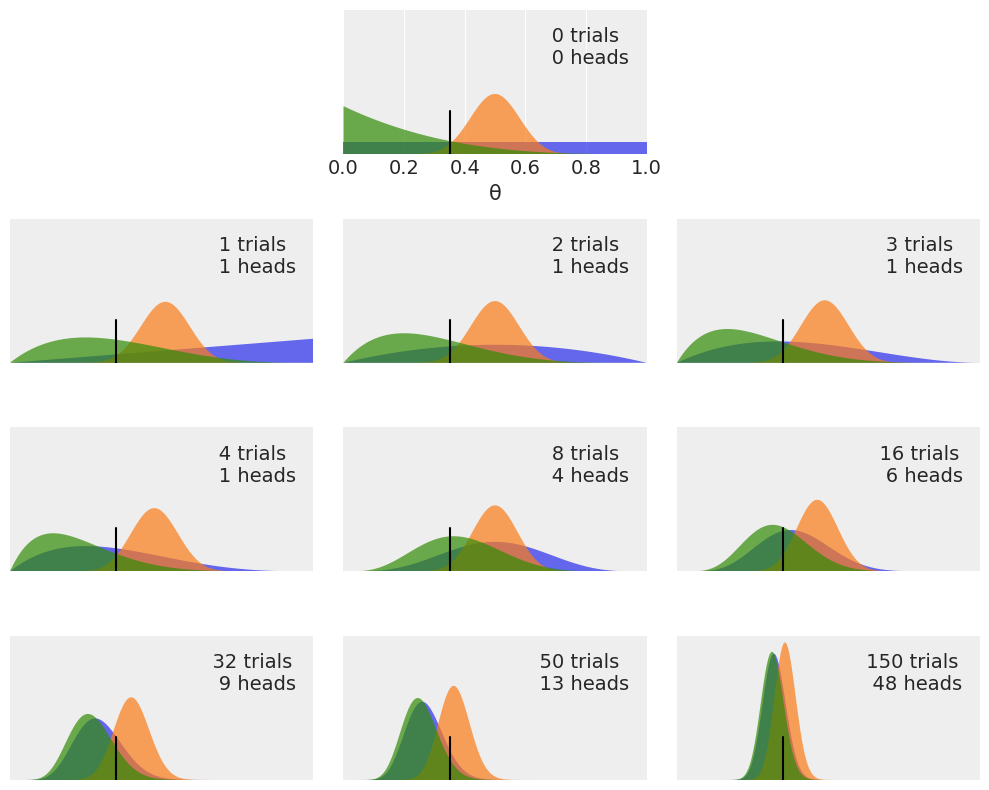

In [30]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = stats.beta.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()
plt.savefig('B11197_01_05.png', dpi=300)

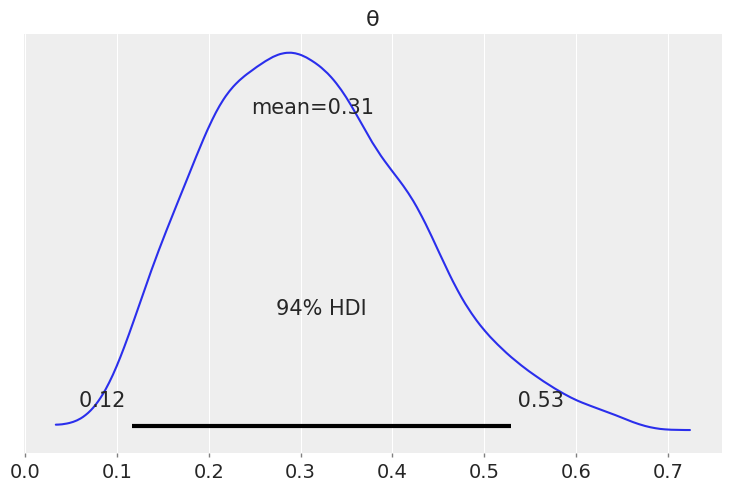

In [34]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})
plt.savefig('B11197_01_07.png', dpi=300)

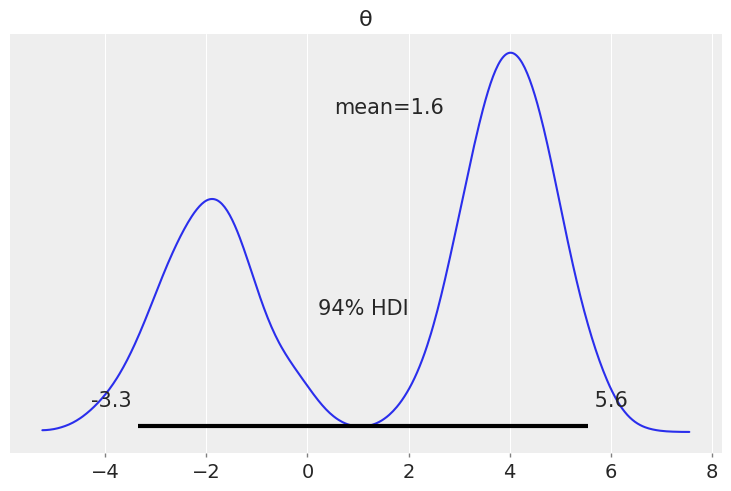

In [33]:
np.random.seed(1)
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))
az.plot_posterior({'θ': mix_norm})
plt.savefig('B11197_01_08.png', dpi=300)

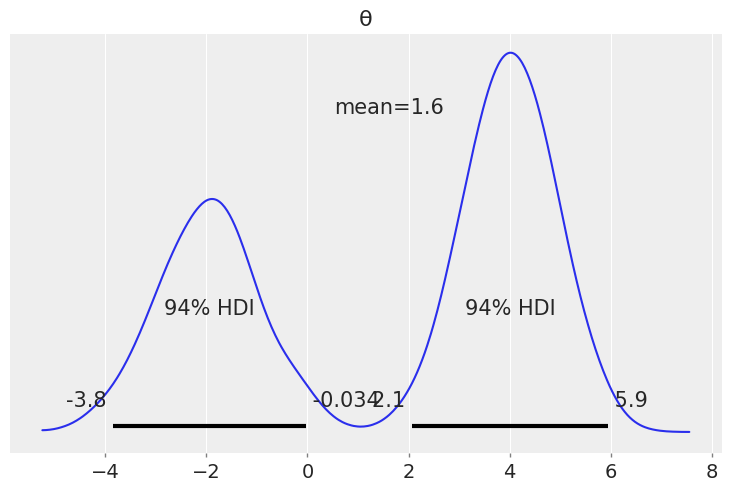

In [35]:
np.random.seed(1)
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))
az.plot_posterior({'θ': mix_norm}, multimodal=True)
plt.savefig('B11197_01_08.png', dpi=300)